**WEB SCRAPPING**

In [1]:
# Scrap data from swiggy
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

url = "https://www.swiggy.com/restaurants/kwality-walls-frozen-dessert-and-ice-cream-shop-iyer-bungalow-narimedu-madurai-319193"
p = requests.get(url)
soup = BeautifulSoup(p.content,'html.parser')
print(p)
content = soup.find_all('div', class_="_2wg_t")
fheader = ["Food_Name","Price","discount","description"]

itemfull = []

for item in content:
  items = []
  Food_name = item.find('div', class_="styles_itemName__hLfgz")
  price = item.find('span', class_="styles_price__2xrhD styles_itemPrice__1Nrpd styles_s__66zLz")
  discount = item.find('span', class_="styles_tagTitle__1FFuq")
  description = item.find('div', class_="styles_itemDesc__3vhM0")

  if(Food_name is not None):
    items.append(Food_name.text)
  else:
    items.append("Food_name is NA")
  if(price is not None):
    items.append(price.text)
  else:
    items.append("No Original Price")
  if(discount is not None):
    items.append(discount.text)
  else:
    items.append("discount is NA")
  if(description is not None):
    items.append(description.text)
  else:
    items.append("No description") 
  itemfull.append(items)

pd.DataFrame(itemfull).to_csv("food.csv",header=fheader)

<Response [200]>


In [2]:
data=pd.read_csv('food.csv')

**BAR PLOT(MATPLOTLIB)**

(array([3., 9., 2., 0., 2., 2., 2., 3., 1., 0., 1., 2., 3., 0., 3., 1., 0.,
        1., 0., 1.]),
 array([ 40.  ,  57.95,  75.9 ,  93.85, 111.8 , 129.75, 147.7 , 165.65,
        183.6 , 201.55, 219.5 , 237.45, 255.4 , 273.35, 291.3 , 309.25,
        327.2 , 345.15, 363.1 , 381.05, 399.  ]),
 <a list of 20 Patch objects>)

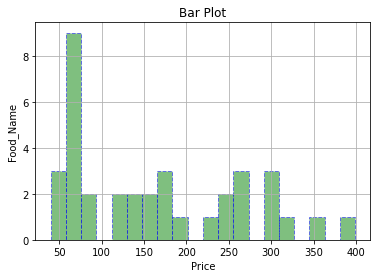

In [3]:
import matplotlib
import matplotlib.pyplot as plt
y = data.Food_Name
x = data.Price
plt.ylabel("Food_Name")
plt.xlabel("Price")
plt.title("Bar Plot")
plt.grid(True)
plt.hist(x, bins=20, color='green', edgecolor='blue',linestyle='--', alpha=0.5)

**LINE & BAR PLOT**

(array([3., 9., 2., 0., 2., 2., 2., 3., 1., 0., 1., 2., 3., 0., 3., 1., 0.,
        1., 0., 1.]),
 array([ 40.  ,  57.95,  75.9 ,  93.85, 111.8 , 129.75, 147.7 , 165.65,
        183.6 , 201.55, 219.5 , 237.45, 255.4 , 273.35, 291.3 , 309.25,
        327.2 , 345.15, 363.1 , 381.05, 399.  ]),
 <a list of 20 Patch objects>)

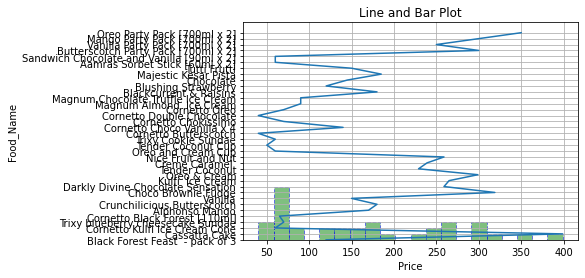

In [4]:
import matplotlib
import matplotlib.pyplot as plt
y = data.Food_Name
x = data.Price
lines=plt.plot(x,y)
plt.ylabel("Food_Name")
plt.xlabel("Price")
plt.title("Line and Bar Plot")
plt.grid(True)
plt.hist(x, bins=20, color='green', edgecolor='blue',linestyle='--', alpha=0.5)

**SCATTER PLOT**

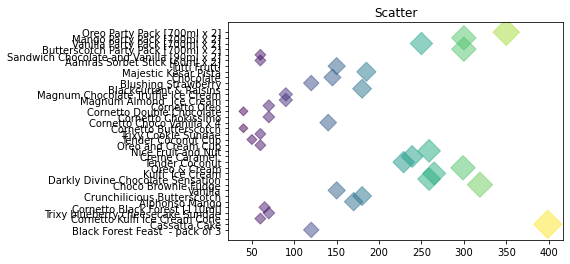

In [5]:
plt.title("Scatter")
plt.scatter(x, y, s=data['Price'], c=data['Price'], marker='D', alpha=0.5)

**2.HIST PLOT(SEABORN)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


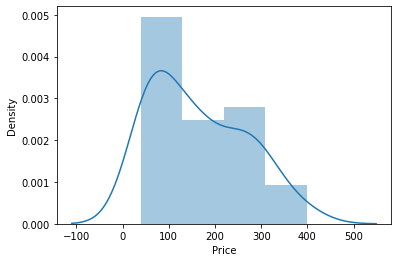

In [6]:
from pandas import read_csv
from seaborn import distplot
from matplotlib import pyplot
dataset = pd.read_csv('food.csv')
# create histogram plot
distplot(dataset['Price'])
# show plot
pyplot.show()

**SCATTER  PLOT**

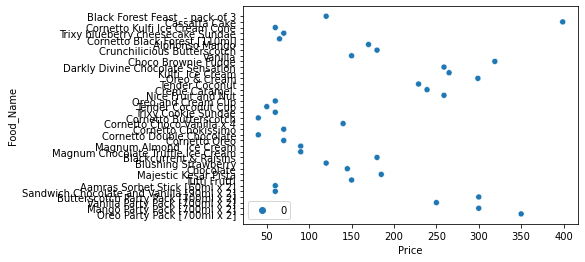

In [7]:
# scatter plot of two numerical variables vs class label
from pandas import read_csv
from seaborn import scatterplot
from matplotlib import pyplot
# create scatter plot
scatterplot(y='Food_Name', x='Price', hue=0, data=dataset)
# show plot
pyplot.show()

**HEAT MAP**

Text(0.5, 1.0, 'Heatmap')

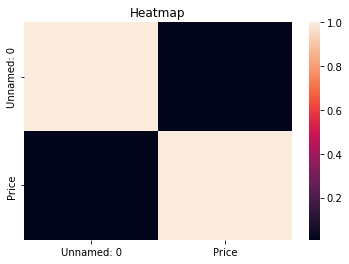

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
 
# first five entries of the tips dataset
data.head()
 
# correlation between the different parameters
tc = data.corr()
 
# plot a heatmap of the correlated data
sns.heatmap(tc)
plt.title("Heatmap")

**KDE PLOT**

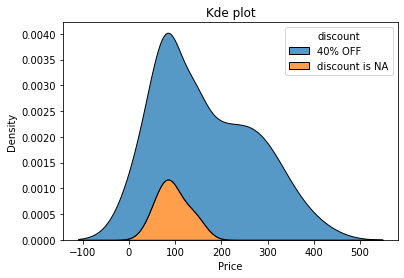

In [9]:
plt.title("Kde plot")
sns.kdeplot(data=data,x='Price',hue='discount',multiple='stack')
plt.show()

**JOINT PLOT**

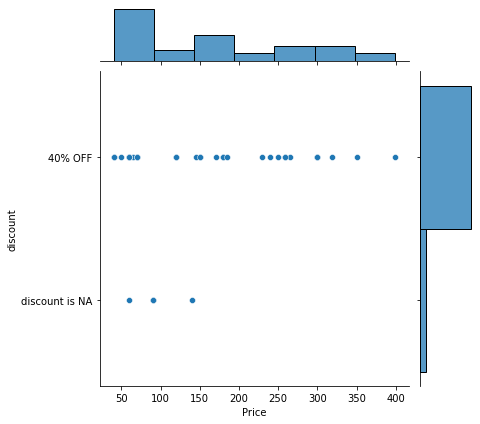

In [10]:
sns.jointplot(x='Price', y='discount', data=data)
plt.show()